In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def initialstate(N):   # random N x N initial spin states

    state = 2 * np.random.randint(0,2,size=(N,N)) - 1 # np.random.randint( 0, 2, size=(N,N))  makes NxN 0/1's, x2, -1 makes NxN -1/+1's
    return state

def calcEnergy(J,config): # calculate energy 

    energy = 0 
    for i in range( len( config)):   
        for j in range( len( config)): # loop over elements of i x j microstate
            S = config[i,j] # get +1/-1 state of particle i,j
            ngbrs = config[ (i+1)%N, j] + config[ i, (j+1)%N] + config[ (i-1)%N,j] + config[ i, (j-1)%N] 
            # sum +1/-1 states of 4 nearest neighbors with (i+/-1, j) and (i, j+/-1)
            # note handling of edge-effects by %N so xtal wraps-around on left / right, top / bottom ends
            energy += -J*ngbrs*S / 2.   # / 2. compensate for double-counting, i.e (i,j) = (1,2) and (i,j) = (2,1) in nested for loop
    return energy

def calcMag(J,config): # calc magnetization, i.e. sum of +1, -1 values of NxN particles

    return np.sum(config)

[[ 1 -1 -1 -1 -1  1 -1 -1 -1  1]
 [ 1 -1  1 -1  1  1 -1  1  1  1]
 [ 1  1  1 -1 -1  1 -1 -1 -1  1]
 [ 1  1 -1 -1  1  1  1 -1  1 -1]
 [-1 -1 -1 -1  1 -1 -1 -1  1  1]
 [-1  1 -1  1 -1 -1 -1  1  1  1]
 [-1 -1 -1 -1  1  1  1 -1 -1  1]
 [ 1  1 -1 -1 -1  1 -1  1 -1 -1]
 [ 1 -1  1 -1  1  1 -1  1 -1  1]
 [ 1 -1  1  1  1 -1  1  1 -1  1]] 10 100


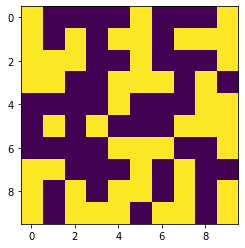

In [34]:
J = 2.0                    # spin.spin interaction strength in units of kT
N = 10                     # size of lattice, N x N (default=10)
config = initialstate(N)   # initialize randomized state

plt.imshow(config)         # plot initial state
print( config, len(config), config.size) # note len() gives no. of rows and size gives no. of elements

In [35]:
Ei = []                     # energy versus step index
E = calcEnergy(J,config)      # initial quantum state energy
Ei.append(E)

Mi = []                     # magnetization versus step index
M = calcMag(J,config)         # initial quantum state magnetization
Mi.append(M)

steps = 10000    
for k in range(steps):

    i = np.random.randint(0,N) # choose dipole i, j to flip 
    j = np.random.randint(0,N) 

    Eo = calcEnergy(J,config) # get prior microstate energy
    config[i,j] *= -1 # flip i,j dipole orientation
    E = calcEnergy(J,config) # get new microstate energy
    
    if np.random.random() > np.exp( -(E-Eo)): # if true reject move, i.e. (E<Eo) are all accepted,  (E>Eo) are somemtimes accepted, 
        config[i,j] *= -1   

    M = calcMag(J,config)
        
    Ei.append(E)
    Mi.append(M)

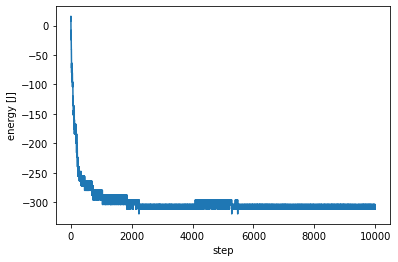

In [36]:
# plot internal energy versus microstate step
plt.plot(Ei)
plt.xlabel("step")
plt.ylabel("energy [J]")
plt.savefig('energy versus step.png')

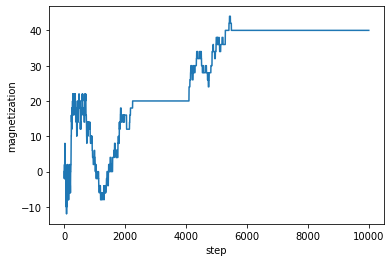

In [37]:
# plot internal energy versus microstate step
plt.plot(Mi)
plt.xlabel("step")
plt.ylabel("magnetization")
plt.savefig('magnetization versus step.png')

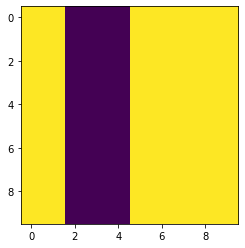

In [38]:
plt.imshow(config)
plt.savefig('magnetization.png')

Text(0, 0.5, 'occupancy')

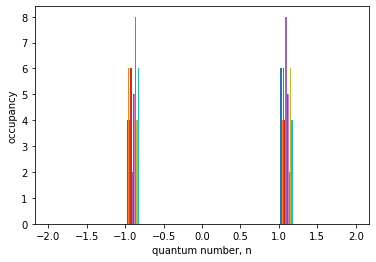

In [ ]:
plt.hist(config, bins=20, range=(-2,2))
plt.xlabel("quantum number, n")
plt.ylabel("occupancy")